<a href="https://colab.research.google.com/github/xavierw39/Twitter-Text-Analysis/blob/main/Twitter_Related_News_Analysis_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
### Background
On April 14, 2022, Elon Musk, the founder of Tesla and SpaceX, announced his intention to acquire Twitter. The acquisition was settled six months later. In these months, many incidents have happened that reflected the confrontations and negotiations between the social platform and the business magnate.

### Project Introduction
This project uses Newsdata API to extract from the web about 5000 Twitter-related news articles from May to November 2022. This project includes:  
* a short description of API data extraction process
* text processing & EDA on the news text
* the use of several NLP methods aimed to identify the trending news topics and the buzzwords regarding Twitter, and
* sentiment analysis and topic modeling of the news text

__This notebooks is the fourth and FINAL part of the Twitter Text Analysis Project.__

### Import Data

In [53]:
# Import complete data
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# since the records data has only description but not full content, we use another data
import json
news_js = open('data0524_1105.json').readlines()
news_lst = []
for line in news_js:
  news_lst.extend(json.loads(line))
news_df = pd.DataFrame(news_lst)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
news_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1032, 13)

Because some of the rows (articles) has only description but the content is None, we want to combine the text. The content is retained if the rows have content, if not, we use description instead.


In [57]:
news_df_valid = news_df[(news_df['content'].isna() == False) | (news_df['description'].isna() == False)]
news_df_valid.drop_duplicates(subset = ["content", "description"]).head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,country,category,language
0,Elon Musk Says Twitter’s Had A Massive Revenue...,https://deadline.com/2022/11/elon-musk-twitter...,"[Advertising, Breaking News, Social Media, act...",[jillg366],None,As Twitter employees face mass layoffs startin...,None,2022-11-04 16:11:22,https://deadline.com/wp-content/uploads/2022/1...,deadline,[united states of america],[business],english
1,Twitter layoffs begin as Elon Musk admits ‘mas...,https://www.theguardian.com/technology/2022/no...,"[Twitter, Elon Musk, Technology]",[Dominic Rushe and Gloria Oladipo in New York ...,None,Billionaire blames financial woes on activist ...,None,2022-11-04 16:00:12,https://i.guim.co.uk/img/media/7cba98d05719d33...,theguardian,[united states of america],[business],english
2,Inside Twitter's chaotic short-notice layoffs,https://www.nbcnews.com/tech/tech-news/twitter...,None,"[Daniel Arkin and Lora Kolodny, CNBC]",None,Twitter was plunged into turmoil Friday after ...,Twitter was plunged into turmoil Friday after ...,2022-11-04 15:49:18,https://media-cldnry.s-nbcnews.com/image/uploa...,nbcnews,[united states of america],[business],english


In [58]:
news_df_valid = news_df_valid.drop_duplicates(subset = ["content", "description"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# content fillna: if content is null, fill content with description
news_df_valid['content'] = news_df_valid['content'].fillna(news_df_valid['description'])
news_df_valid.drop(columns = "description", inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-55839068c0dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_valid['content'] = news_df_valid['content'].fillna(news_df_valid['description'])
<ipython-input-59-55839068c0dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [60]:
news_df_valid.to_csv('news_cleaned.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Polarity Analysis

#### Import Data and Packages


In [61]:
# Import nltk libraries for sentiment analysis (vader_lexicon)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
news_df_valid['content'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'As Twitter employees face mass layoffs starting today, new overlord Elon Musk says the platform has seen “a massive drop in revenue, due to activist groups pressuring advertisers.” General Mills, Audi and others confirmed in recent days that they’ve paused advertising on Twitter after Musk’s ascension. The deal close last week saw an upsurge in […]'

In [63]:
sent_analyzer.polarity_scores(news_df_valid['content'][0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.5423}

#### Polarity Calculation
**Calculate the polarity scores (negative, neutral, positive) of each news article**

In [64]:
polarity_scores = news_df_valid['content'].apply(lambda x: sent_analyzer.polarity_scores(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
news_df_sent = pd.concat([news_df_valid, polarity_scores.apply(pd.Series)], axis = 1)
# dict.apply(pd.Series) converts polarity score dict into a dataframe, then we combine the sentiment columns into the main dataframe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
news_df_sent.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,link,keywords,creator,video_url,content,pubDate,image_url,source_id,country,category,language,neg,neu,pos,compound
0,Elon Musk Says Twitter’s Had A Massive Revenue...,https://deadline.com/2022/11/elon-musk-twitter...,"[Advertising, Breaking News, Social Media, act...",[jillg366],None,As Twitter employees face mass layoffs startin...,2022-11-04 16:11:22,https://deadline.com/wp-content/uploads/2022/1...,deadline,[united states of america],[business],english,0.077,0.923,0.000,-0.5423
1,Twitter layoffs begin as Elon Musk admits ‘mas...,https://www.theguardian.com/technology/2022/no...,"[Twitter, Elon Musk, Technology]",[Dominic Rushe and Gloria Oladipo in New York ...,None,Billionaire blames financial woes on activist ...,2022-11-04 16:00:12,https://i.guim.co.uk/img/media/7cba98d05719d33...,theguardian,[united states of america],[business],english,0.190,0.736,0.074,-0.9097
2,Inside Twitter's chaotic short-notice layoffs,https://www.nbcnews.com/tech/tech-news/twitter...,None,"[Daniel Arkin and Lora Kolodny, CNBC]",None,Twitter was plunged into turmoil Friday after ...,2022-11-04 15:49:18,https://media-cldnry.s-nbcnews.com/image/uploa...,nbcnews,[united states of america],[business],english,0.077,0.865,0.057,-0.8389
3,Twitter spent years building its staff. Under ...,https://www.latimes.com/business/story/2022-11...,None,[Samantha Masunaga],None,"Hiring is challenging for every industry, but ...",2022-11-04 15:48:44,https://ca-times.brightspotcdn.com/dims4/defau...,latimes,[united states of america],[business],english,0.080,0.828,0.091,0.9281
4,Elon Musk's Twitter begins laying off employee...,https://news.google.com/__i/rss/rd/articles/CB...,None,None,None,Elon Musk's Twitter begins laying off employee...,2022-11-04 15:32:00,None,google,[united states of america],[business],english,0.105,0.852,0.043,-0.5707


In [67]:
news_df_sent[['neg','neu','pos','compound']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,neg,neu,pos,compound
count,989.000000,989.000000,989.000000,989.000000
mean,0.080024,0.855529,0.064451,-0.088295
std,0.069306,0.081376,0.054498,0.616045
min,0.000000,0.587000,0.000000,-0.999200
25%,0.025000,0.808000,0.019000,-0.624900
50%,0.072000,0.855000,0.061000,-0.051600
75%,0.115000,0.908000,0.095000,0.421500
max,0.412000,1.000000,0.348000,0.999100


From the chart above I bring out a descriptive statistics of the four aspects of the polarity scores. The extremic sentiments are less prevalent than neutral sentiment (the mean from negative sentiment is
0.08, positive 0.06, and neutral 0.88)

The mean compound score of -0.08 indicates that the general sentiment of the news sample about Twitter is negative. However, the large standard deviation implies that the compounded sentiment scores for individual news are significantly different.

#### Visualize Sentiment Score
__Change of Sentiment score by time__

In [68]:
# add a date column to the data
date_str = [date[:10] for date in news_df_sent['pubDate']]

from datetime import datetime
date_obj = [datetime.strptime(date, "%Y-%m-%d") for date in date_str]
news_df_sent['Date'] = date_obj

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
news_df_sent.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['title', 'link', 'keywords', 'creator', 'video_url', 'content',
       'pubDate', 'image_url', 'source_id', 'country', 'category', 'language',
       'neg', 'neu', 'pos', 'compound', 'Date'],
      dtype='object')

In [70]:
# calculate the mean of each sentiment scores by date
news_df_sent[['Date','neg', 'neu', 'pos', 'compound']].groupby('Date').mean().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,neg,neu,pos,compound
0,2022-05-24,0.041000,0.885500,0.073500,-0.212550
1,2022-05-25,0.071938,0.854688,0.073438,-0.032387
2,2022-05-26,0.062000,0.870200,0.067600,0.010490
3,2022-05-27,0.106000,0.872667,0.021333,-0.438467
4,2022-05-28,0.108000,0.825000,0.066000,-0.969600
...,...,...,...,...,...
123,2022-10-31,0.057800,0.890633,0.051567,-0.033327
124,2022-11-01,0.059933,0.912333,0.027767,-0.121077
125,2022-11-02,0.088875,0.863687,0.047500,0.003350
126,2022-11-03,0.063278,0.881333,0.055389,-0.034439


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-ffc32717bcec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  news_sent_mean = news_df_sent.groupby('Date').mean().reset_index()


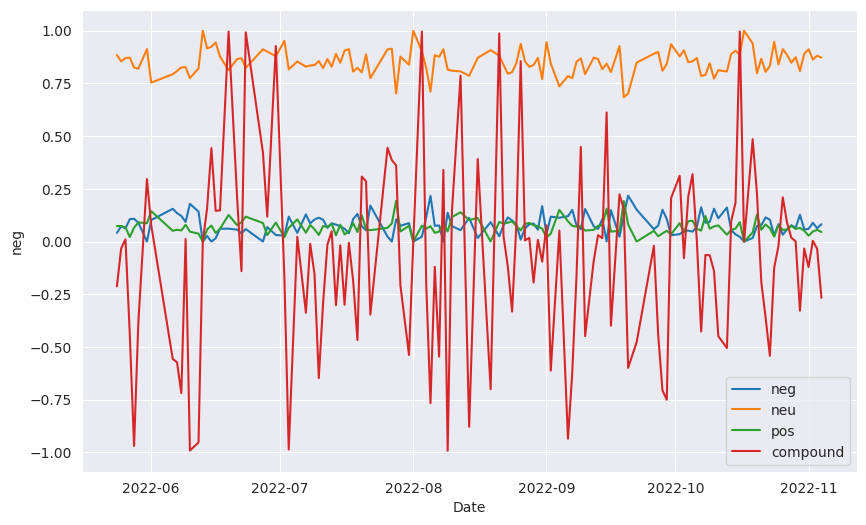

In [71]:
# how does the sentiment scores changes daily in the last few months?
news_sent_mean = news_df_sent.groupby('Date').mean().reset_index()
plt.figure(figsize = (10, 6))
for column in ['neg','neu','pos','compound']:
  sns.lineplot(data=news_sent_mean, x='Date', y= column, label= column)

plt.xlabel('Date')
plt.legend()

plt.show()

The chart shows that the news sentiment does not have a clear trend over time.

In [72]:
#!pip install nrclex

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### NRC Sentiment Classification
**Sentiment Classification using NRCLexicon**

NRC is a project that's been widely applied to analyze and predict sentiments in text. It focuses on unigrams and classifies text into ten general emotions such as positive emotions like anticipation, joy, and negative ones like fear and anger.

Here I would try to apply the NRC classification on our Twitter-related news to see what are the specific emotions related to the social media.

In [73]:
from nrclex import NRCLex

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
emotions = NRCLex(news_df_valid['content'].iloc[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
emotions.affect_frequencies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'fear': 0.0,
 'anger': 0.0,
 'anticip': 0.0,
 'trust': 0.2857142857142857,
 'surprise': 0.14285714285714285,
 'positive': 0.2857142857142857,
 'negative': 0.0,
 'sadness': 0.0,
 'disgust': 0.0,
 'joy': 0.14285714285714285,
 'anticipation': 0.14285714285714285}

In [76]:
emotions.affect_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'confirmed': ['positive', 'trust'],
 'deal': ['anticipation', 'joy', 'positive', 'surprise', 'trust']}

In [77]:
# extract emotions from the entire text
text = " ".join(news_df_valid['content'])
emotion_text = NRCLex(text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
emotion_text.affect_frequencies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'fear': 0.08299253655045497,
 'anger': 0.07473673448522646,
 'anticip': 0.0,
 'trust': 0.16736530007156733,
 'surprise': 0.05214190778039055,
 'positive': 0.21554544525099684,
 'negative': 0.13510888457212963,
 'sadness': 0.05653818627952152,
 'disgust': 0.029189244453532357,
 'joy': 0.0694203046723239,
 'anticipation': 0.11696145588385645}

In [79]:
emotion_dict = emotion_text.affect_frequencies
y = list(emotion_dict.keys())
x = list(emotion_dict.values())

print(y, "\n", x)

['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation'] 
 [0.08299253655045497, 0.07473673448522646, 0.0, 0.16736530007156733, 0.05214190778039055, 0.21554544525099684, 0.13510888457212963, 0.05653818627952152, 0.029189244453532357, 0.0694203046723239, 0.11696145588385645]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
# from the above output we see that the 3rd element "anticip" is invalid, so we remove it
# y.pop(2), x.pop(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='score', ylabel='emotion'>

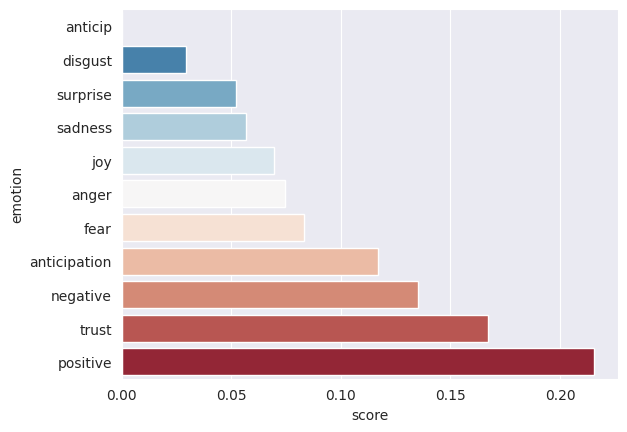

In [81]:
# create a df to sort the emotions by nrc scores and then show the barplot
sns.barplot(x = 'score', y = 'emotion', data = pd.DataFrame({'score':x, 'emotion':y}).sort_values('score'), palette = "RdBu_r")

Apart from the "positive" and "negative" sentiments, I am interested in the words associated with "trust" and "anticipation", which are also very common among other sentiments.

In [82]:
anticip_words = []
for word, emotions in emotion_text.affect_dict.items():
  if "anticipation" in emotions:
    anticip_words.append(word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
anticip_words[:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['deal',
 'pay',
 'pretty',
 'court',
 'happen',
 'develop',
 'improve',
 'competition',
 'shortly',
 'public',
 'expected',
 'attempt',
 'entertainment',
 'present',
 'cash',
 'thriving',
 'uphill',
 'continue',
 'hopeful',
 'plan']

In [84]:
trust_words = []
for word, emotions in emotion_text.affect_dict.items():
  if "trust" in emotions:
    trust_words.append(word)
trust_words[:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['confirmed',
 'deal',
 'experienced',
 'content',
 'team',
 'solidarity',
 'found',
 'accounts',
 'professional',
 'pay',
 'exchange',
 'save',
 'frank',
 'pretty',
 'remarkable',
 'effective',
 'verification',
 'account',
 'general',
 'counsel']

### **Topic Modeling**

Onto the next part, I'd like to try some topic modeling techniques to see if we can summarize common topics in our text of interest.

In [85]:
news_df_valid.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,link,keywords,creator,video_url,content,pubDate,image_url,source_id,country,category,language
0,Elon Musk Says Twitter’s Had A Massive Revenue...,https://deadline.com/2022/11/elon-musk-twitter...,"[Advertising, Breaking News, Social Media, act...",[jillg366],None,As Twitter employees face mass layoffs startin...,2022-11-04 16:11:22,https://deadline.com/wp-content/uploads/2022/1...,deadline,[united states of america],[business],english
1,Twitter layoffs begin as Elon Musk admits ‘mas...,https://www.theguardian.com/technology/2022/no...,"[Twitter, Elon Musk, Technology]",[Dominic Rushe and Gloria Oladipo in New York ...,None,Billionaire blames financial woes on activist ...,2022-11-04 16:00:12,https://i.guim.co.uk/img/media/7cba98d05719d33...,theguardian,[united states of america],[business],english
2,Inside Twitter's chaotic short-notice layoffs,https://www.nbcnews.com/tech/tech-news/twitter...,None,"[Daniel Arkin and Lora Kolodny, CNBC]",None,Twitter was plunged into turmoil Friday after ...,2022-11-04 15:49:18,https://media-cldnry.s-nbcnews.com/image/uploa...,nbcnews,[united states of america],[business],english
3,Twitter spent years building its staff. Under ...,https://www.latimes.com/business/story/2022-11...,None,[Samantha Masunaga],None,"Hiring is challenging for every industry, but ...",2022-11-04 15:48:44,https://ca-times.brightspotcdn.com/dims4/defau...,latimes,[united states of america],[business],english
4,Elon Musk's Twitter begins laying off employee...,https://news.google.com/__i/rss/rd/articles/CB...,None,None,None,Elon Musk's Twitter begins laying off employee...,2022-11-04 15:32:00,None,google,[united states of america],[business],english


Set up Count Vectorizer
The function of the count vectorizer here is to split our text into bigrams, trigrams, and 4-grams, and find the meaningful terms to create topic modeling.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
# term frequency vectorizer
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=100, # select 500 most frequent features (word)
                                token_pattern = r'\b[a-zA-Z]{3,}\b', # match words with 3 or more characters
                                max_df = 0.8, # max_df remove terms that are too frequent. Here we remove terms with more than 80% frequency
                                min_df = 20, # min_df remove terms that are too infrequent. Her we remove terms appear less than 20 times
                                ngram_range=(2,4))
tf = tf_vectorizer.fit_transform(news_df_valid['content'])
print(tf.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(989, 100)


#### Modeling and HyperParameter Tuning


##### Starter Model 0

In [87]:
from sklearn.decomposition import LatentDirichletAllocation

lda_tf0 = LatentDirichletAllocation(n_components=8, # first use a large number of topics
                                   max_iter=100,
                                   learning_method='batch',
                                   random_state = 28474460)

lda_tf0.fit(tf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(max_iter=100, n_components=8, random_state=28474460)

In [88]:
tf_feature_names = tf_vectorizer.get_feature_names_out() # get the feature names out into the variable

n_top_words = 10
# display the topics returned by the starter model
def top_feature_names(lda_tf, tf_feature_names, n_top_words):
  topics = dict()
  for topic_idx, topic in enumerate(lda_tf.components_):
    ordered_indexes = topic.argsort() # sort the tokens (feature relevance) in the topic ascendingly
    reversed_indexes = list(reversed(ordered_indexes)) # reverse the tokens (descending)
    top_indexes = reversed_indexes[:n_top_words] # most relevant tokens
    top_features = [tf_feature_names[i] for i in top_indexes] # from the 500 features from the document, extract the actual word using index
    topics[topic_idx] = top_features # store the topic-to-features name mapping in dictionary
  return topics
topics_0 = top_feature_names(lda_tf0, tf_feature_names, n_top_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
pd.DataFrame(topics_0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7
0,elon musk,buy twitter,social media,elon musk,elon musk,spam accounts,chancery court,twitter whistleblower
1,free speech,deal buy,media company,tesla ceo,google news,merger agreement,elon musk,whistleblower complaint
2,content moderation,deal buy twitter,social media company,twitter employees,coverage google,fake accounts,delaware chancery,peiter zatko
3,parag agrawal,elon musk,elon musk,ceo elon musk,coverage google news,delaware court,delaware chancery court,elon musk
4,social media,tesla stock,social media platform,ceo elon,musk twitter,elon musk,social media,billion deal
5,twitter ceo,tesla shares,media platform,new york,twitter deal,court chancery,twitter lawsuit,buy company
6,ceo parag,twitter deal,social media giant,washington post,wall street,twitter board,close deal,billion deal buy
7,ceo parag agrawal,billion deal buy,media giant,musk said,new york,exchange commission,social media platform,deal buy
8,musk said,musk deal,musk plans,tesla spacex,fox businesselon,fake spam,media platform,company musk
9,jack dorsey,world richest,fake accounts,share twitter,businesselon musk,securities exchange,deal twitter,says twitter


From the result above, our starter model is able to discern some interesting topics from extracted terms. It seems like some topics (such as 5 and 6) are not clearly expressed and contain words that are overlapped.

##### Model 1: Less topics

In [90]:
lda_tf = LatentDirichletAllocation(n_components=5, # number of topics generated
                                   max_iter=100,
                                   learning_method='batch',
                                   random_state = 28474460)

lda_tf.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()

n_top_words = 8
topics_1 =top_feature_names(lda_tf, tf_feature_names, n_top_words)
pd.DataFrame(topics_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
0,elon musk,buy twitter,social media,elon musk,elon musk
1,free speech,elon musk,elon musk,merger agreement,google news
2,content moderation,deal buy,media platform,spam accounts,coverage google news
3,parag agrawal,deal buy twitter,social media platform,fake accounts,coverage google
4,twitter ceo,chancery court,media company,delaware court,musk twitter
5,musk said,billion deal,social media company,twitter board,twitter deal
6,washington post,delaware chancery,social media giant,tesla ceo,wall street
7,ceo parag agrawal,delaware chancery court,media giant,walk away,elon musk twitter


Seems like the new model doesn't return more meaningful topics. Let's adjust our paramters.

##### Model 2: More topics, lower term frequency threshold.

In [91]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=100, # select 500 most frequent features (word)
                                token_pattern = r'\b[a-zA-Z]{3,}\b', # match words with 3 or more characters
                                max_df = 0.6, # max_df remove terms that are too frequent. Here we remove terms with more than 60% frequency
                                min_df = 15, # min_df remove terms that are too infrequent. Her we remove terms appear less than 20 times
                                ngram_range=(2,4))
tf = tf_vectorizer.fit_transform(news_df_valid['content'])

lda_tf = LatentDirichletAllocation(n_components=6, # number of topics generated
                                   max_iter=100,
                                   learning_method='batch',
                                   random_state = 28474460)

lda_tf.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()

n_top_words = 8
topics_2 =top_feature_names(lda_tf, tf_feature_names, n_top_words)
pd.DataFrame(topics_2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5
0,google news,chancery court,buy twitter,social media,twitter ceo,social media
1,coverage google news,delaware chancery court,elon musk twitter,media platform,parag agrawal,spam accounts
2,coverage google,delaware chancery,musk twitter,social media platform,ceo parag,merger agreement
3,twitter deal,billion deal,social media,free speech,ceo parag agrawal,fake accounts
4,musk twitter,twitter lawsuit,media company,content moderation,twitter elon,delaware court
5,wall street,buy company,social media company,musk said,twitter elon musk,media company
6,new york,tesla shares,deal buy,washington post,tesla ceo,social media company
7,fox businesselon,buy twitter,deal buy twitter,donald trump,jack dorsey,court chancery


from this model, we can roughly summarize each topics the text touches on:
Topic 0: news coverage

Topic 1: buyout and lawsuit related terms

Topic 2 & Topic 3: content moderation and freech speech

Topic 4: key personal figures

Topic 5: other

#### Topic Visual with pyLDAvis

In [92]:
#!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are two issues I encountered when I tried to use pyLDAvis to visualize my topic model.

1. Starting from approx. May 2023, the syntax "pyLDAvis.sklearn.prepare" is not supported anymore. Instead, "pyLDAvis.lda_model.prepare" is used. for detail information, you can refer to this answer on Stackoverflow.
https://stackoverflow.com/questions/76836793/jupyter-notebook-cannot-import-pyldavis-sklearn

2. When I try to prepare the visual, a "Broken Process Pool" error is found, and my workaround is to revert to an older pandas version, which is definitely not ideal.



In [100]:
# older pandas version:
#!pip install pandas==1.5.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_tf, tf, tf_vectorizer, R = 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.145771 -0.086133       1        1  27.251635
0     -0.168927  0.339526       2        1  25.076170
3      0.073928 -0.056126       3        1  16.056599
1      0.165336 -0.018035       4        1  12.510608
2      0.128952  0.032058       5        1  10.382436
4     -0.345060 -0.211291       6        1   8.722552, topic_info=                    Term        Freq       Total Category  logprob  loglift
36           google news  317.000000  317.000000  Default  10.0000  10.0000
20  coverage google news  315.000000  315.000000  Default   9.0000   9.0000
19       coverage google  315.000000  315.000000  Default   8.0000   8.0000
8            buy twitter  237.000000  237.000000  Default   7.0000   7.0000
67          social media  478.000000  478.000000  Default   6.0000   6.0000
..                   ...         ...         ...      ...      ...      ...
57         parag agrawal   72.796722   85.461890   Topic6  -2.3254   2.2789
10              ceo elon   35.060814   54.125294   Topic6  -3.0559   2.0050
11         ceo elon musk   35.060814   54.125294   Topic6  -3.0559   2.0050
38          legal battle   23.194830   47.724904   Topic6  -3.4691   1.7177
73             tesla ceo   56.950304  138.408686   Topic6  -2.5708   1.5512

[86 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2         1  0.375559     billion deal
2         2  0.122465     billion deal
2         3  0.048986     billion deal
2         4  0.383724     billion deal
2         5  0.065315     billion deal
...     ...       ...              ...
96        3  0.056030      wall street
96        4  0.032017      wall street
96        6  0.032017      wall street
97        3  0.874922  washington post
97        4  0.120679  washington post

[154 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 2, 3, 5])

Let's interpret this visualization:

1. Each bubble represents a topic, and the distance between them represent how different they are from each other. Except for topic 2 and 6, all other topics are quite similar.

2. The size of the bubble represents percentage of words in the corpus (entire text) that is about that topics. The larger the bubble, the more popular the topic is among the examined text.

3. The bar chart demonstrates the frequency of each word in the topics, and compare the amount to the word in the entire corpus. For example, in topic 1 the term "merger agreement" appears about 100 times in the topic, and appears 110 times in the entire corpus, meaning the word is quite specific to this topic. Conversely, the term "social media" is popular among different topics.

In [99]:
# Save our result to html
final_visual = pyLDAvis.lda_model.prepare(lda_tf, tf, tf_vectorizer, R = 10)
pyLDAvis.save_html(final_visual, 'twitter_lda.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


That concluded our series of **Twitter Takeover News Analysis**. Thank you for your reading!